In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
labels = "airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, trucks"
labels = labels.split(', ')
labels

['airplanes',
 'cars',
 'birds',
 'cats',
 'deer',
 'dogs',
 'frogs',
 'horses',
 'ships',
 'trucks']

array([6], dtype=uint8)

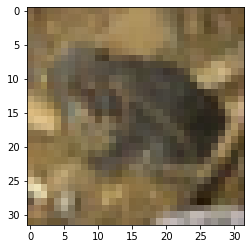

In [ ]:
plt.imshow(x_train[23])
y_train[23]

In [ ]:
labels[y_train[0][0]]

'frogs'

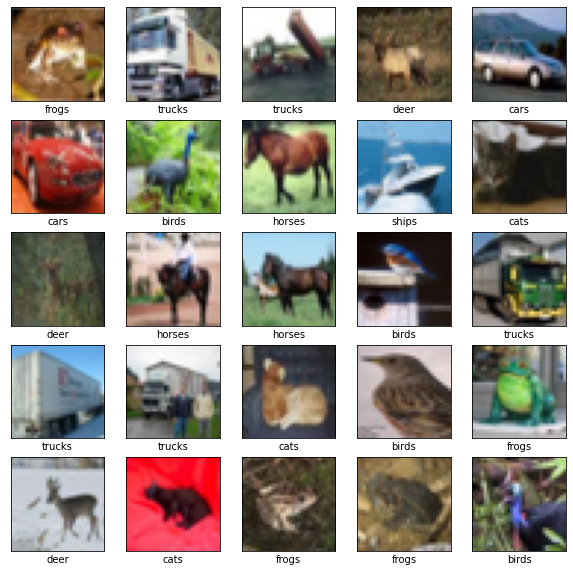

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(labels[y_train[i][0]])

In [ ]:
# Normalization 
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_new = to_categorical(y_train)
y_train_new[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
to_categorical?

In [ ]:
y_test_new = to_categorical(y_test)
y_test_new[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# # CNN Architecture
# 1. Conv2D
# 2. maxPooling
# 3. Conv2D
# 4. maxPooling
# 5. Flatten
# 6. Dense

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
____________________________________________________

Assignment : 
Integrating TensorDash

https://www.youtube.com/watch?v=HYRok9qYDt8&list=UU7vE1a6VGqXVt9f64QaNjng&index=1

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics =['accuracy'])

In [ ]:
history = model.fit(x_train,y_train_new,epochs=10,validation_data=(x_test,y_test_new))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4520 - accuracy: 0.4802 - val_loss: 1.1827 - val_accuracy: 0.5861
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1277 - accuracy: 0.6078 - val_loss: 1.0926 - val_accuracy: 0.6141
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9948 - accuracy: 0.6576 - val_loss: 0.9877 - val_accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9124 - accuracy: 0.6877 - val_loss: 0.9360 - val_accuracy: 0.6807
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8525 - accuracy: 0.7086 - val_loss: 0.9672 - val_accuracy: 0.6666
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8016 - accuracy: 0.7249 - val_loss: 0.9385 - val_accuracy: 0.6846
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7652 - accuracy: 0.7371 - val_loss: 0.9171 - val_accuracy:

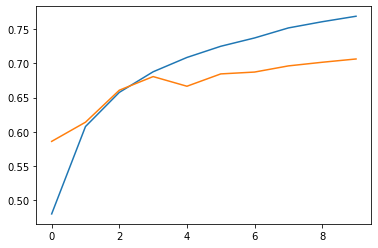

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')

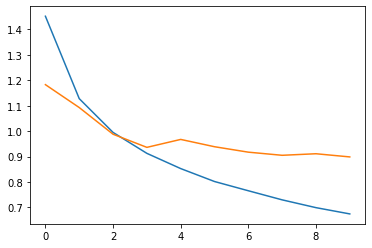

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')

In [ ]:
!wget https://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit.jpg

In [ ]:
path = '/content/horse.JPG'
a = plt.imread(path)
plt.imshow(a)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
x = image.load_img(path,target_size=(32,32,3))

In [ ]:
plt.imshow(x)

In [ ]:
import numpy as np
x = image.img_to_array(x)/255
x = np.expand_dims(x,axis=0)
y = model.predict_classes(x)[0]
y = labels[y]
y

In [ ]:
y_pred = model.predict_classes(x_test)
y_pred

In [ ]:
import numpy as np
y_test_n = np.ndarray.flatten(y_test)
y_test_n

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test_n)

In [ ]:
confusion_matrix(y_pred,y_test_n)

In [ ]:
print(classification_report(y_pred,y_test_n))